In [2]:
import pandas as pd
import numpy as np
import random as rd
from scipy.signal import lfilter
import matplotlib
from matplotlib import pyplot as plt

In [4]:
#Time Series
n = 10000
n_samples = np.linspace(0,n-1,n) 

white_noise = np.random.normal(0, 1, n) # white noise with 10000 samples
s_data = np.sign(white_noise) #desired time serie, a white noise between -1 and 1 with mean=0, stddev=1 and n samples
s_data_nl = np.arctan(s_data) #desired time serie with nonlinearity

x_input = lfilter([1, 0.6, 0, 0.2], 1, s_data) #filtered input time serie
x_input_nl = lfilter([1, 0.6, 0, 0.2], 1, s_data_nl) #filtered input time serie

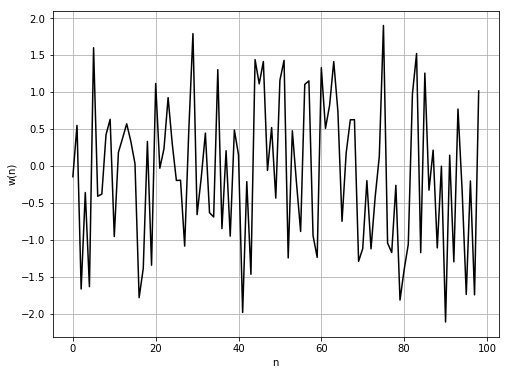

In [3]:
#White Noise Plot 
fig = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], white_noise[0:99], color='black')
plt.xlabel('n')
plt.ylabel('w(n)')

plt.grid()
plt.show()

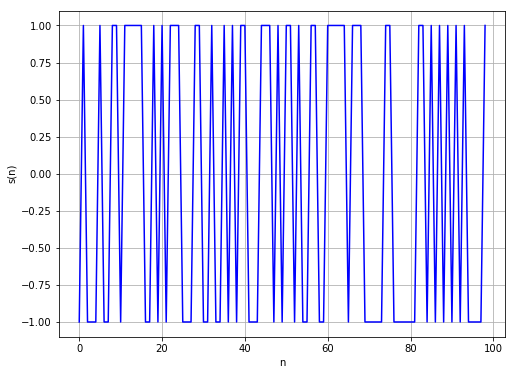

In [4]:
#Desired Time Serie Plot (White Noise between -1 and 1)
fig2 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], s_data[0:99], color='blue')
plt.xlabel('n')
plt.ylabel('s(n)')

plt.grid()
plt.show()

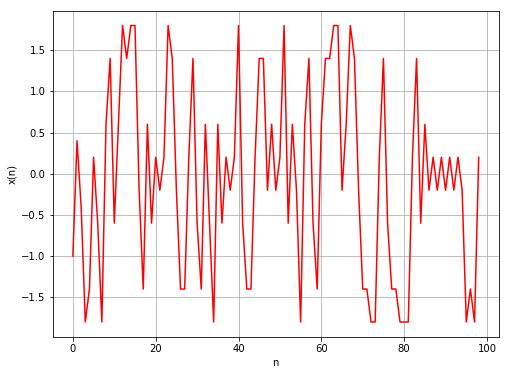

In [5]:
#Input Time Serie Plot (Filtered Time Serie)
fig3 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input[0:99], color='red')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

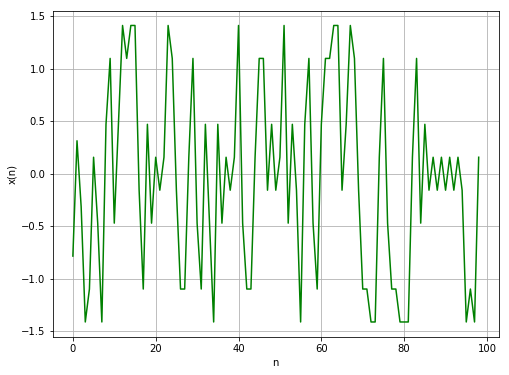

In [6]:
#Input Time Serie Plot (Filtered Time Serie)
fig4 = plt.figure(figsize=(8.0, 6.0))
ax = fig.gca()
plt.plot(n_samples[0:99], x_input_nl[0:99], color='green')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.grid()
plt.show()

In [22]:
def perceptron(x_input, s_data, bias, lr):
    
    wind = 3
    winx = 2
    xm = np.zeros(winx)
    
    x_data = np.append(xm, x_input) 
    
    w = np.zeros(wind)
    w_temp = np.append(bias, w) #dim = 4
   
    y_out = []
   
    #for k in range (0, len(x_input)-1):
    for k in range (0, len(x_input)):
        
        w = w_temp #dim = 4
        
        x_temp = x_data[k:wind+k] #dim = 3
        x_temp2 = x_temp[::-1] #reverse x_temp
        x_temp3 = np.append(1, x_temp2) #dim = 4
        
        #y_temp is the dot product between w_temp and x_temp
        y_temp = np.sign(np.dot(w,x_temp3))
        y_out.append(y_temp)
       
        if y_temp == s_data[k]:
            w_out = w
        else:
            w_out = w - lr*(s_data[k] - y_temp)*x_temp3
    
        w_temp = w_out
        
    return w_out, y_out

In [45]:
def EQM(s_data, y_data):
    
    esignal = []
    
    for k in range(0,len(y_data)):
        esample = (y_data[k] - s_data[k])**2
        esignal.append(esample)
    
    eqm_temp = np.sum(esignal)
    eqm = eqm_temp/len(y_data)


    return eqm

In [23]:
#Time Series Without Non Linearity (x_input, s_data)
wtheta_perceptron, y_perceptron = perceptron(x_input, s_data, 0.5, 0.02)

In [41]:
wtheta_perceptron

array([  33.82 , -370.208, -135.904,  -90.224])

In [34]:
y_perceptron

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0

In [35]:
#Time Series With Non Linearity (x_input_nl, s_data_nl)
wtheta_perceptron_nl, y_perceptron_nl = perceptron(x_input_nl, s_data_nl, 0.5, 0.02)

In [36]:
wtheta_perceptron_nl

array([ 198.30088514, -119.72388919,    3.95010098,    1.95757382])

In [37]:
y_perceptron_nl

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [50]:
eqm_perceptron = EQM(s_data, y_perceptron)
eqm_perceptron

3.5179999999999998

In [49]:
eqm_perceptron_nl = EQM(s_data_nl, y_perceptron_nl)
eqm_perceptron_nl

1.5948591264929559